# Install libraries

In [2]:
!pip install catboost
!pip install category_encoders


# Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# load Data

In [5]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data

In [6]:
#df.head(3)
#df.tail(3)
df.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1655,Badrinath Yatra,(1967),140 min,"Crime, Drama",NaN,NaN,Dhirubhai Desai,Nirupa Roy,Abhi Bhattacharya,Indira
2242,Bhola Bhala,(1978),NaN,"Action, Crime, Drama",6.3,28,Satpal,Rajesh Khanna,Rekha,Moushumi Chatterjee
6452,Jai Maa Sherawaali,(2008),NaN,"Drama, Family, Fantasy",NaN,NaN,Samir,Shashi,Mukesh Bharati,Julie Bir
11705,Ramprasad Ki Tehrvi,(2019),115 min,"Comedy, Drama",7.6,"3,574",Seema Bhargava,Manoj Pahwa,Deepika Amin,Ninad Kamat
2282,Bhoot Ke Peeche Bhoot,(2003),NaN,Horror,3.4,8,Kishan Shah,Hemant Birje,Pinky Chinoy,Mohan Joshi


In [7]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values>0]

,0
Duration,8269
Rating,7590
Votes,7589
Actor 3,3144
Actor 2,2384
Genre,1877
Actor 1,1617
Year,528
Director,525


<Axes: >

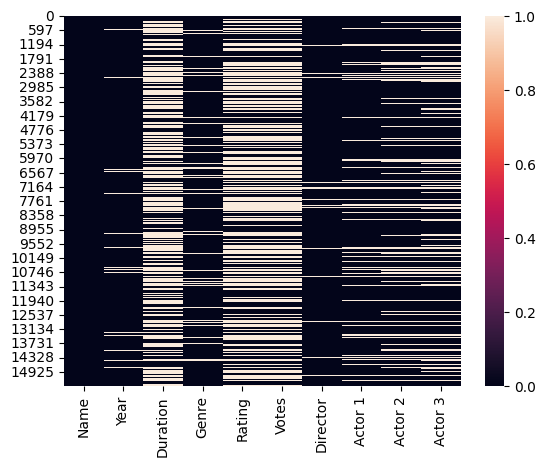

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = df.drop('Name',axis=1)

In [12]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [13]:
df.sample(5)
#df.info()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4184,1990,171,Drama,7.1,84,Govind Nihalani,Dimple Kapadia,Shekhar Kapur,Mita Vashisht
508,2013,100,"Drama, Horror, Thriller",3.8,623,Suparn Varma,Jaideep Ahlawat,Bipasha Basu,Padam Bhola
15478,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
4169,1999,92,Horror,3.8,18,Bhooshan Lal,Priya Rao,Kiran Kumar,Mohan Joshi
6740,1991,132,"Action, Drama",2.5,34,Swaroop Kumar,Anil Kapoor,Tina Ambani,Urmila Bhatt


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   int64  
 1   Duration  5659 non-null   int64  
 2   Genre     5659 non-null   object 
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   int64  
 5   Director  5659 non-null   object 
 6   Actor 1   5659 non-null   object 
 7   Actor 2   5659 non-null   object 
 8   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 442.1+ KB


<Axes: >

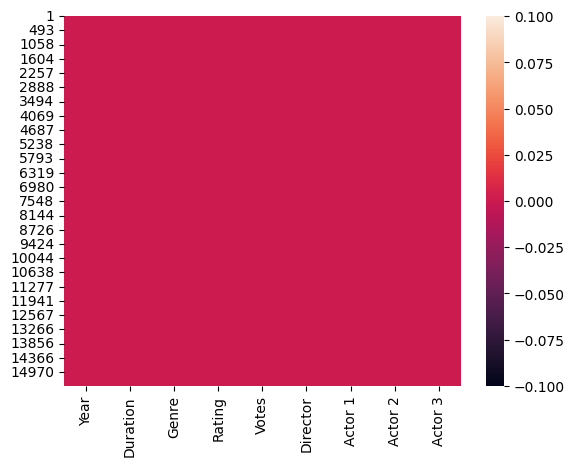

In [15]:
sns.heatmap(df.isnull())

# data analysis

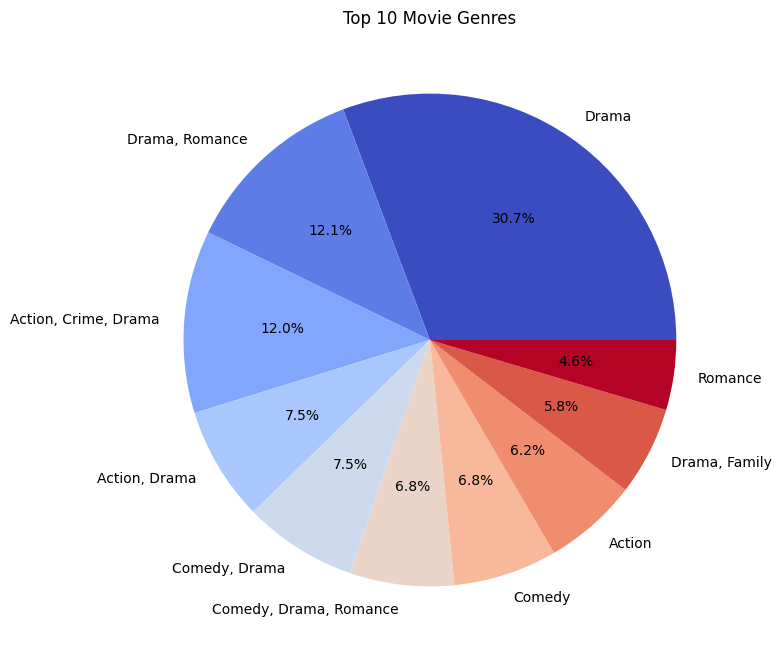

In [16]:
plt.figure(figsize=(8, 8))
df['Genre'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', cmap="coolwarm")
plt.ylabel("")
plt.title("Top 10 Movie Genres")
plt.show()

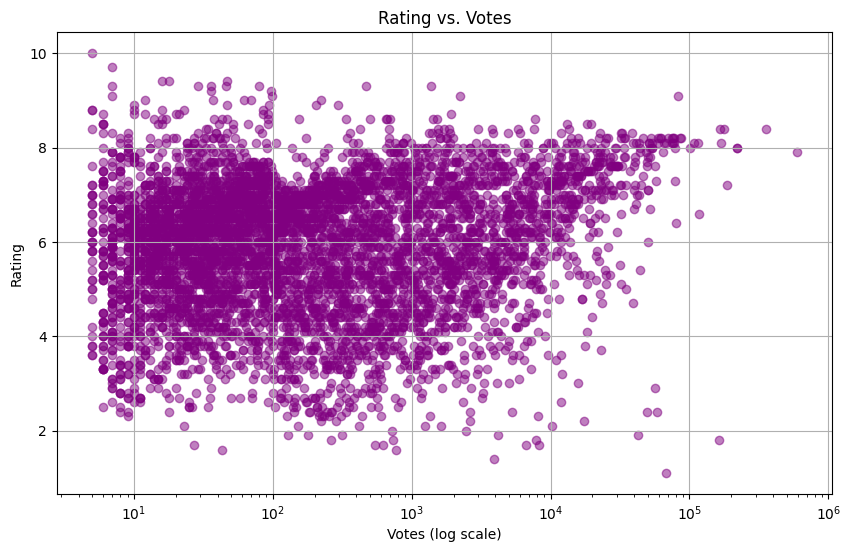

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Rating'], alpha=0.5, color='purple')
plt.xscale("log")
plt.xlabel("Votes (log scale)")
plt.ylabel("Rating")
plt.title("Rating vs. Votes")
plt.grid(True)
plt.show()

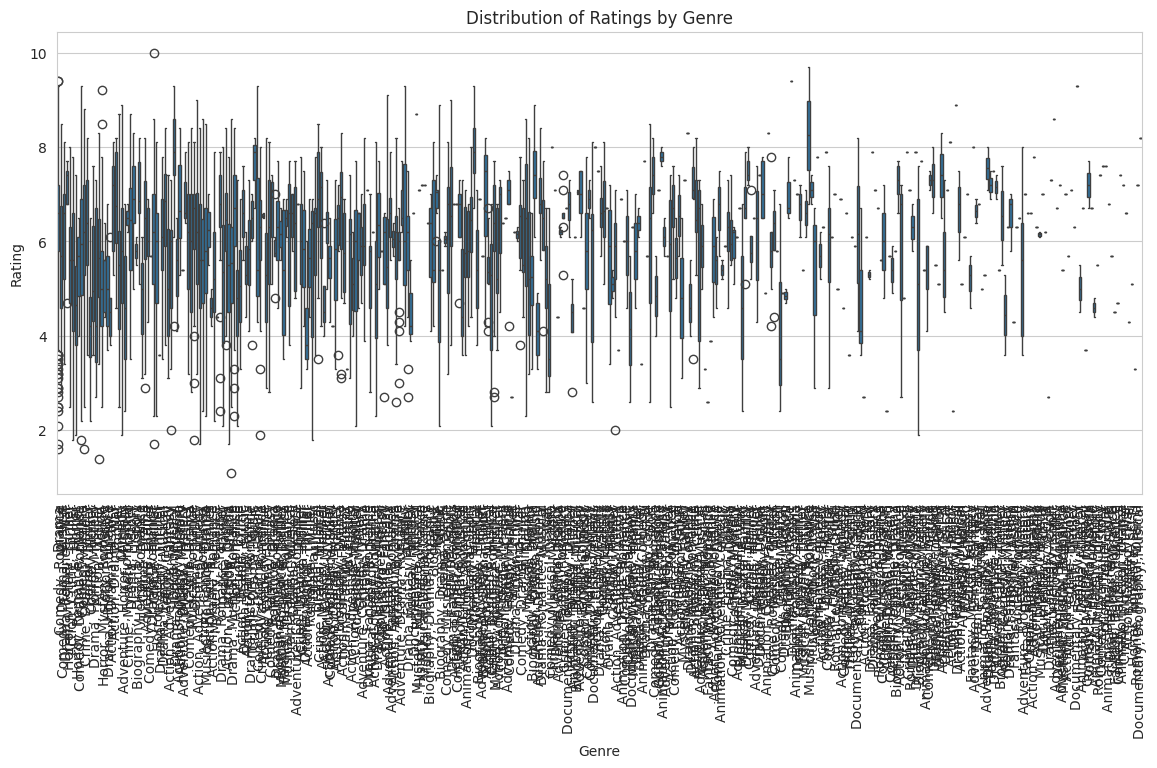

In [18]:

sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
sns.boxplot(x=df['Genre'], y=df['Rating'])
plt.xticks(rotation=90)
plt.title("Distribution of Ratings by Genre")
plt.show()

<ipython-input-19-711f7364495c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette="magma")


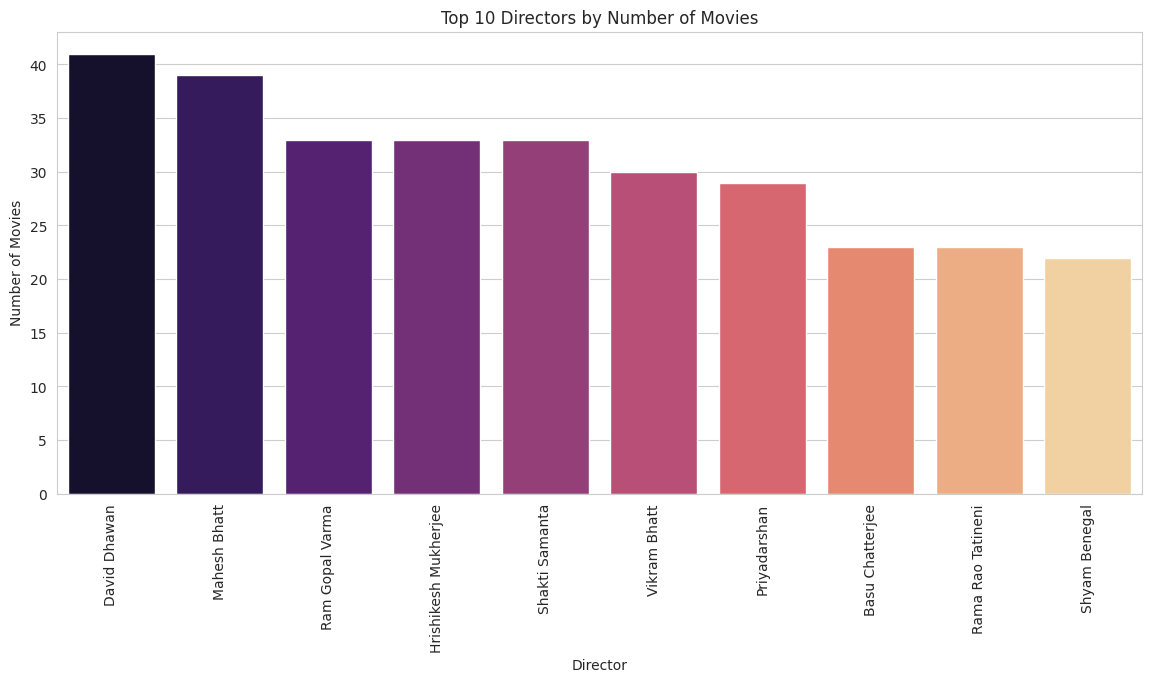

In [19]:

plt.figure(figsize=(14, 6))
top_directors = df['Director'].value_counts().head(10)
sns.barplot(x=top_directors.index, y=top_directors.values, palette="magma")
plt.xticks(rotation=90)
plt.ylabel("Number of Movies")
plt.title("Top 10 Directors by Number of Movies")
plt.show()

# Preparing data for a model

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   int64  
 1   Duration  5659 non-null   int64  
 2   Genre     5659 non-null   object 
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   int64  
 5   Director  5659 non-null   object 
 6   Actor 1   5659 non-null   object 
 7   Actor 2   5659 non-null   object 
 8   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 442.1+ KB


In [21]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [22]:
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating

df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


In [23]:
x = df.drop("Rating",axis = 1 )
y = df.Rating

In [25]:
import category_encoders as ce

encoder = ce.JamesSteinEncoder(return_df=True)
categorical_columns = x.select_dtypes(include=['object']).columns
encoder.fit(x[categorical_columns], y)
encoded_features = encoder.transform(x[categorical_columns])
x = x.drop(columns=categorical_columns)
x = pd.concat([x, encoded_features], axis=1)

x.head(3)


,Year,Duration,Votes,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Genre,Director,Actor 1,Actor 2,Actor 3
1,2019,109,8,6.415521,7.000000,6.850000,7.000000,7.000000,6.190458,7.000000,6.828095,7.000000,7.000000
3,2019,110,35,5.716822,4.400000,5.420000,4.400000,4.450000,5.801780,4.400000,5.600479,4.400000,4.453784
5,1997,147,827,6.242222,5.313333,4.788889,5.786667,5.872727,6.089309,5.592601,5.243878,5.845137,5.884803


In [26]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.30,shuffle=True,
                                      random_state=11)

# Create model

In [27]:
model1 = SVR()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = LinearRegression()

model5 = XGBRegressor()
model6 = LGBMRegressor()
model7 = CatBoostRegressor(verbose=0)

In [28]:
results = []

def test(model, model_name):
    model.fit(xtrain, ytrain)
    predict = model.predict(xtest)
    mse = mean_squared_error(ytest, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, predict)
    r1 = np.corrcoef(ytest, predict)[0, 1]
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print(f"R1 Score: {r1}")
    print("-" * 30)
    results.append({
        "Model": model_name,
        "Mean Squared Error": mse,
        "RMSE": rmse,
        "R2 Score": r2,
        "R1 Score": r1
    })

test(model1, "Model 1")
test(model2, "Model 2")
test(model3, "Model 3")
test(model4, "Model 4")

results_df = pd.DataFrame(results)
results_df


Model: Model 1
Mean Squared Error: 1.8625440422182509
RMSE: 1.364750542120519
R2 Score: 0.030307640054989204
R1 Score: 0.23458885904558036
------------------------------
Model: Model 2
Mean Squared Error: 0.3089413939929328
RMSE: 0.5558249670471207
R2 Score: 0.8391564963645546
R1 Score: 0.9161406169551674
------------------------------
Model: Model 3
Mean Squared Error: 0.32964346045528575
RMSE: 0.5741458529461706
R2 Score: 0.8283784233479783
R1 Score: 0.910178688374665
------------------------------
Model: Model 4
Mean Squared Error: 0.4184534379694757
RMSE: 0.6468797708766875
R2 Score: 0.7821414728489001
R1 Score: 0.8844451712721764
------------------------------


,Model,Mean Squared Error,RMSE,R2 Score,R1 Score
0,Model 1,1.862544,1.364751,0.030308,0.234589
1,Model 2,0.308941,0.555825,0.839156,0.916141
2,Model 3,0.329643,0.574146,0.828378,0.910179
3,Model 4,0.418453,0.646880,0.782141,0.884445


In [29]:
test(model5, "Model 5")

Model: Model 5
Mean Squared Error: 0.31153016726415583
RMSE: 0.5581488755378405
R2 Score: 0.8378087088192222
R1 Score: 0.9154394643256162
------------------------------


In [30]:
test(model6, "Model 6")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 3961, number of used features: 13
[LightGBM] [Info] Start training from score 5.903635
Model: Model 6
Mean Squared Error: 0.2947241383759661
RMSE: 0.5428850139541209
R2 Score: 0.8465583960451327
R1 Score: 0.9201171322579951
------------------------------


In [31]:
test(model7, "Model 7")

Model: Model 7
Mean Squared Error: 0.2708607310239091
RMSE: 0.52044282205052
R2 Score: 0.8589823512735878
R1 Score: 0.9268224167283798
------------------------------


# The best model is CatBoostRegressor.